In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import japanize_matplotlib

In [3]:
#新潟県地図の描画
#　niigata_GML
df_geo = gpd.read_file('DSA_data/niigata_GML/N03-19_15_190101.geojson')
df_geo

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,新潟県,None,新潟市,北区,15101,"POLYGON ((139.23232 37.96692, 139.23170 37.966..."
1,新潟県,None,新潟市,北区,15101,"POLYGON ((139.22642 38.01164, 139.22634 38.011..."
2,新潟県,None,新潟市,東区,15102,"POLYGON ((139.06929 37.95113, 139.06927 37.950..."
3,新潟県,None,新潟市,東区,15102,"POLYGON ((139.06995 37.95365, 139.06977 37.953..."
4,新潟県,None,新潟市,東区,15102,"POLYGON ((139.06989 37.95366, 139.06981 37.953..."
...,...,...,...,...,...,...
2694,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.25175 38.49180, 139.25171 38.491..."
2695,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.25482 38.49200, 139.25475 38.491..."
2696,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.24996 38.49461, 139.24990 38.494..."
2697,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.24972 38.49504, 139.24964 38.494..."


(137.52173875051298, 140.01315066550083, 36.64567605372692, 38.64443591916236)

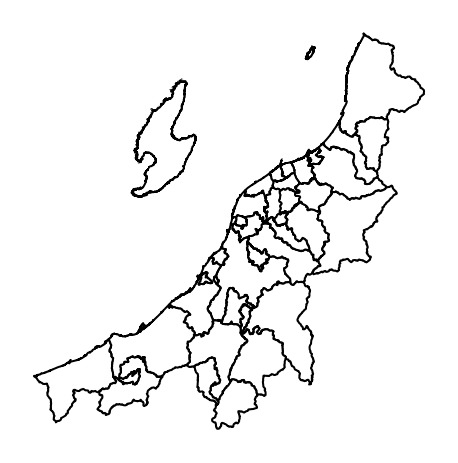

In [10]:
#白地図
df_geo.plot(color='w', edgecolor='k')
plt.xticks([])
plt.yticks([])
plt.axis('off')

In [32]:
niigataCities = df_geo['N03_004'].unique()
niigataCities#重複していないやつ

array(['北区', '東区', '中央区', '江南区', '秋葉区', '南区', '西区', '西蒲区', '長岡市', '三条市',
       '柏崎市', '新発田市', '小千谷市', '加茂市', '十日町市', '見附市', '村上市', '燕市', '糸魚川市',
       '妙高市', '五泉市', '上越市', '阿賀野市', '佐渡市', '魚沼市', '南魚沼市', '胎内市', '聖籠町',
       '弥彦村', '田上町', '阿賀町', '出雲崎町', '湯沢町', '津南町', '刈羽村', '関川村', '粟島浦村'],
      dtype=object)

In [34]:
len(niigataCities)

37

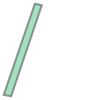

In [35]:
df_geo['geometry'][3]

In [36]:
#描画したいデータの準備
ngtPref_data = [k for k in range(len(niigataCities))]
print(ngtPref_data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [38]:
df_ngtPref = pd.DataFrame({'city':niigataCities, 'data':ngtPref_data})
df_ngtPref.head()

,city,data
0,北区,0
1,東区,1
2,中央区,2
3,江南区,3
4,秋葉区,4


In [39]:
df_ngtPref = pd.merge(df_geo, df_ngtPref, left_on='N03_004', right_on='city')
df_ngtPref

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry,city,data
0,新潟県,None,新潟市,北区,15101,"POLYGON ((139.23232 37.96692, 139.23170 37.966...",北区,0
1,新潟県,None,新潟市,北区,15101,"POLYGON ((139.22642 38.01164, 139.22634 38.011...",北区,0
2,新潟県,None,新潟市,東区,15102,"POLYGON ((139.06929 37.95113, 139.06927 37.950...",東区,1
3,新潟県,None,新潟市,東区,15102,"POLYGON ((139.06995 37.95365, 139.06977 37.953...",東区,1
4,新潟県,None,新潟市,東区,15102,"POLYGON ((139.06989 37.95366, 139.06981 37.953...",東区,1
...,...,...,...,...,...,...,...,...
2694,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.25175 38.49180, 139.25171 38.491...",粟島浦村,36
2695,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.25482 38.49200, 139.25475 38.491...",粟島浦村,36
2696,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.24996 38.49461, 139.24990 38.494...",粟島浦村,36
2697,新潟県,None,岩船郡,粟島浦村,15586,"POLYGON ((139.24972 38.49504, 139.24964 38.494...",粟島浦村,36


<AxesSubplot:>

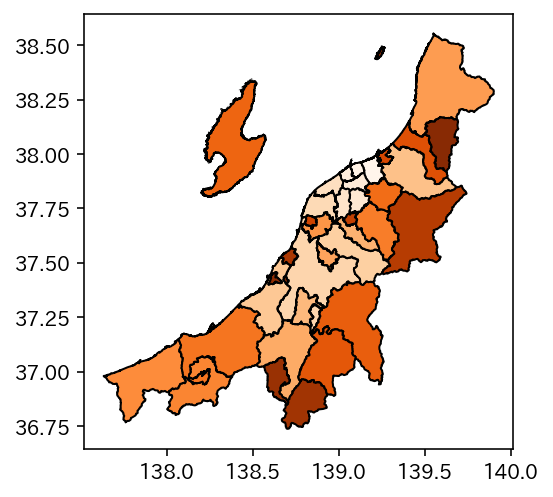

In [42]:
#データの地図上への描画
df_ngtPref.plot(column='data', ec='k', cmap='Oranges')

In [43]:
#新潟市地図の描画
import os
folder = 'DSA_data/niigata_8ku'
filelist=os.listdir(path=folder)
filelist

['15101.json',
 '15102.json',
 '15103.json',
 '15104.json',
 '15105.json',
 '15106.json',
 '15107.json',
 '15108.json']

In [47]:
#8区分統合
df = pd.DataFrame([])
for k in range(len(filelist)):
    fo = os.path.join(folder, filelist[k])
    print(fo)
    df_add = gpd.read_file(fo)
    df = pd.concat(([df, df_add]), ignore_index=True, sort=False)
df

DSA_data/niigata_8ku\15101.json
DSA_data/niigata_8ku\15102.json
DSA_data/niigata_8ku\15103.json
DSA_data/niigata_8ku\15104.json
DSA_data/niigata_8ku\15105.json
DSA_data/niigata_8ku\15106.json
DSA_data/niigata_8ku\15107.json
DSA_data/niigata_8ku\15108.json


,id,geometry
0,15101,"POLYGON ((139.23232 37.96692, 139.23170 37.966..."
1,15101,"POLYGON ((139.22642 38.01164, 139.22634 38.011..."
2,15102,"POLYGON ((139.06929 37.95113, 139.06927 37.950..."
3,15102,"POLYGON ((139.06995 37.95365, 139.06977 37.953..."
4,15102,"POLYGON ((139.06989 37.95366, 139.06981 37.953..."
5,15102,"POLYGON ((139.07046 37.95527, 139.07044 37.955..."
6,15102,"POLYGON ((139.12415 37.96021, 139.12419 37.960..."
7,15103,"POLYGON ((139.06333 37.94597, 139.06328 37.945..."
8,15103,"POLYGON ((139.06353 37.94603, 139.06349 37.946..."
9,15103,"POLYGON ((139.06371 37.94606, 139.06364 37.946..."


In [53]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        35 non-null     object  
 1   geometry  35 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 688.0+ bytes


In [56]:
df['id']=df['id'].astype('int')
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        35 non-null     int32   
 1   geometry  35 non-null     geometry
dtypes: geometry(1), int32(1)
memory usage: 548.0 bytes


<AxesSubplot:>

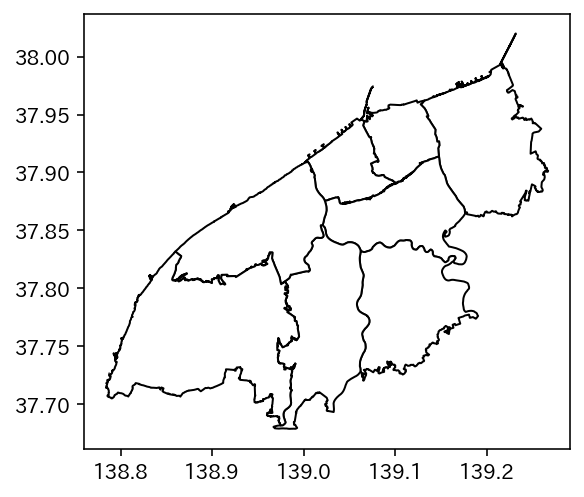

In [49]:
#白地図
df.plot(color='white', edgecolor='k');

In [63]:
mydata = pd.read_excel('DSA_data/niigata8kudata.xlsx')
mydata

,id,mydata
0,15101,14
1,15102,16
2,15103,94
3,15104,194
4,15105,95
5,15106,98
6,15107,44
7,15108,54


In [64]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      8 non-null      int64
 1   mydata  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [65]:
df_ngc8ku = pd.merge(df, mydata, on='id')
df_ngc8ku.head()

,id,geometry,mydata
0,15101,"POLYGON ((139.23232 37.96692, 139.23170 37.966...",14
1,15101,"POLYGON ((139.22642 38.01164, 139.22634 38.011...",14
2,15102,"POLYGON ((139.06929 37.95113, 139.06927 37.950...",16
3,15102,"POLYGON ((139.06995 37.95365, 139.06977 37.953...",16
4,15102,"POLYGON ((139.06989 37.95366, 139.06981 37.953...",16


<AxesSubplot:>

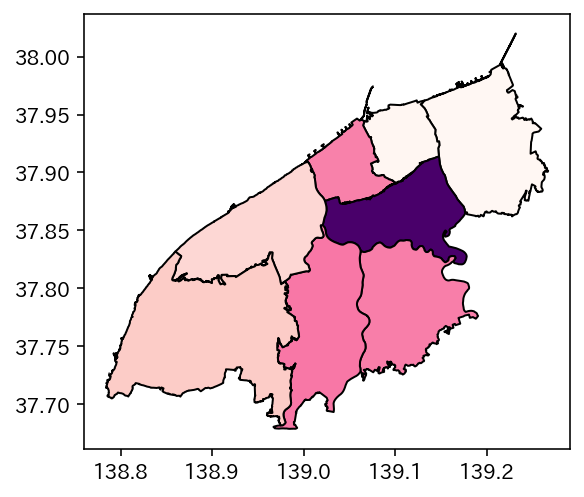

In [70]:
df_ngc8ku.plot(column='mydata', edgecolor='k', cmap='RdPu')

In [71]:
# 各区のデータをバブルチャート表示
df_ngcward = pd.read_excel('DSA_data/niigata_ward.xlsx')
df_ngcward

,ward,id,lat,lon,population,households
0,北区,15101,37.906983,139.199565,73952,29295
1,東区,15102,37.924800,139.092500,136610,61366
2,中央区,15103,37.922400,139.043200,175107,87273
3,江南区,15104,37.872452,139.117150,68621,27252
4,秋葉区,15105,37.795926,139.109961,76897,30131
5,南区,15106,37.770980,139.028693,44606,16155
6,西区,15107,37.851099,138.956997,156749,68882
7,西蒲区,15108,37.747765,138.908223,56585,20540


In [75]:
gdf_ngcPlot = gpd.GeoDataFrame(df_ngcward, geometry=gpd.points_from_xy(df_ngcward.lon, df_ngcward.lat))
gdf_ngcPlot

,ward,id,lat,lon,population,households,geometry
0,北区,15101,37.906983,139.199565,73952,29295,POINT (139.19957 37.90698)
1,東区,15102,37.924800,139.092500,136610,61366,POINT (139.09250 37.92480)
2,中央区,15103,37.922400,139.043200,175107,87273,POINT (139.04320 37.92240)
3,江南区,15104,37.872452,139.117150,68621,27252,POINT (139.11715 37.87245)
4,秋葉区,15105,37.795926,139.109961,76897,30131,POINT (139.10996 37.79593)
5,南区,15106,37.770980,139.028693,44606,16155,POINT (139.02869 37.77098)
6,西区,15107,37.851099,138.956997,156749,68882,POINT (138.95700 37.85110)
7,西蒲区,15108,37.747765,138.908223,56585,20540,POINT (138.90822 37.74777)


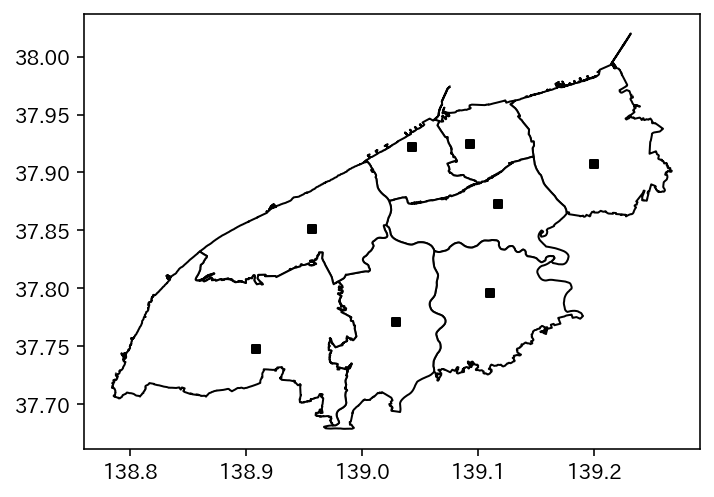

In [79]:
base=df.plot(color='white', edgecolor='k')
gdf_ngcPlot.plot(ax=base, marker='s', color='k', markersize=20);

Text(0, -0.2, '追加情報')

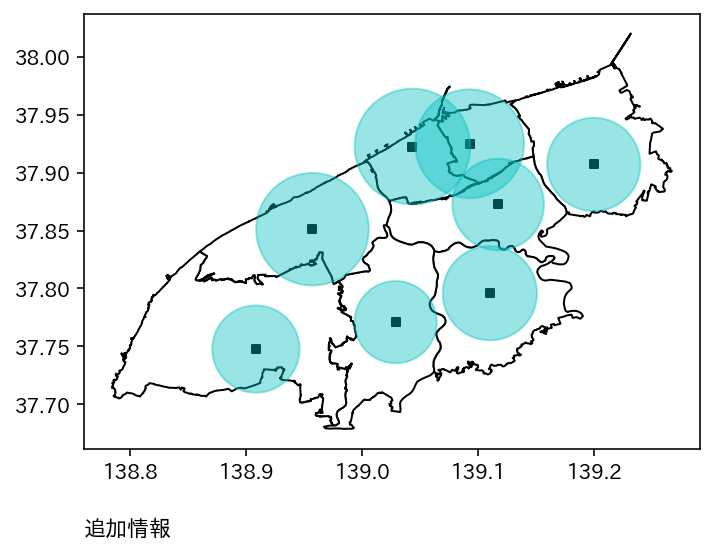

In [91]:
#バブルチャート
base=df.plot(color='white', edgecolor='k')
gdf_ngcPlot.plot(ax=base, marker='s', color='k', markersize=20);

area_scale=np.sqrt(gdf_ngcPlot['population'])
gdf_ngcPlot.plot(ax=base, marker='o', color='c',
                markersize=area_scale*8, alpha=0.4)
comment='追加情報'
plt.annotate(comment, xy=(0,-0.2), size=11, xycoords='axes fraction')